In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math


def Euclidian_Distance(x,y):
    sum=0
    for i in range(len(x)):
        sum+= (x[i]-y[i])**2
    p= math.sqrt(sum)
    return p

In [2]:
def region_query(df,pt,eps):

    npt=[]
    ls1=[pt['x'],pt['y']]
    for ind,nei in df.iterrows():
            ls2=[nei['x'],nei['y']]
            if Euclidian_Distance(ls1,ls2)<eps:
                npt.append(ind)
    return npt

In [3]:
def expand_cluster(df,pt,neibour_pts,c,eps,minpts):
    #print("reached expand cluster.....",neibour_pts)
    for ind in neibour_pts:
        if df.loc[ind,'status']!="visited":
            #print("before",ind,df.loc[ind,'status'])
            df.loc[ind,'status']='visited'
            #print("after",ind,df.loc[ind,'status'])
            npts= region_query(df,df.iloc[ind],eps)
            if len(npts)>=minpts:
                neibour_pts.extend(npts)

        if df.loc[ind,'cluster']=="nil":
            df.loc[ind,'cluster']=c

    #print("after:",len(neibour_pts),neibour_pts)
    return df

In [4]:
def DBSCAN(df_org):

    df= df_org.copy()
    minpts=3
    eps=1.5

    df['cluster']="nil"

    df['status']="unvisited"

    clust=0
    length= len(df)
    for i in range(length):
        if(df.loc[i,'status']!= "visited"):
            df.loc[i,'status']='visited'
            neibour_pts= region_query(df,df.iloc[i],eps)
        
            if len(neibour_pts)<minpts:
                df.loc[i,'cluster']='noise'
            else:
                clust+=1
                c="cluster"+str(clust)
                df.loc[i,'cluster']=c
                df= expand_cluster(df,df.iloc[i], neibour_pts,c,eps,minpts)

    return df

In [11]:
def DBSCAN_plotting(df):
    cluster= df['cluster'].value_counts()
    fig,ax=plt.subplots(1,2, figsize=(15,8))

    ax[0].scatter(df['x'],df['y'])
    ax[0].set_title("Before clustering")
    
    rgb=['b','g','r','c','m','y','k']
    j=0
    for c in list(cluster.index):
        p=[]
        q=[]
        for i in range(len(df)):
            if df.loc[i,'cluster']==c:
                p.append(df.loc[i,'x'])
                q.append(df.loc[i,'y'])
               # print(p,q)
        j=(j+1)%len(rgb)
        ax[1].scatter(p,q,c=rgb[j])
        ax[1].set_title("After clustering")

         x      y   cluster   status
0    31.95   7.95     noise  visited
1    31.15   7.30  cluster1  visited
2    30.45   6.65  cluster1  visited
3    29.70   6.00  cluster1  visited
4    28.90   5.55  cluster1  visited
..     ...    ...       ...      ...
307  15.75  13.85  cluster3  visited
308  15.65  14.05  cluster3  visited
309  15.65  14.25  cluster3  visited
310  15.65  14.50  cluster3  visited
311  15.65  14.60  cluster3  visited

[312 rows x 4 columns]


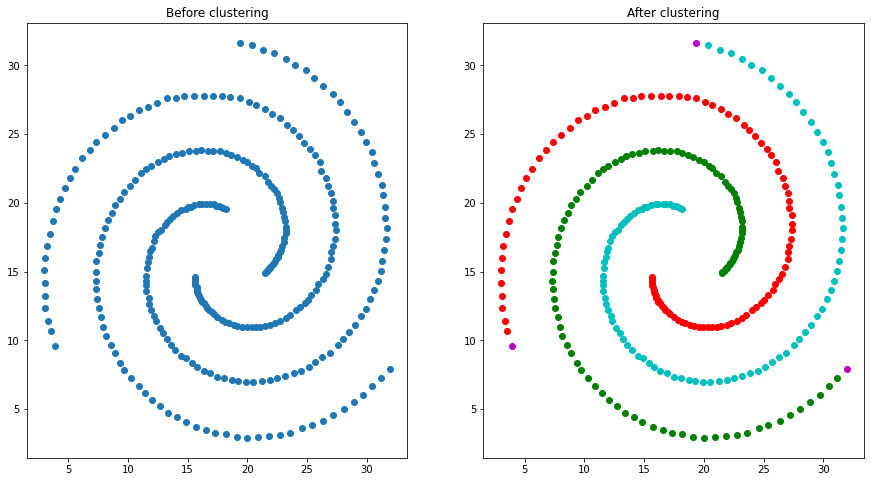

In [12]:
df_org= pd.read_csv('spiral.csv')
df= DBSCAN(df_org)
print(df)
DBSCAN_plotting(df)
plt.show()